<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Без-учёта-дисбаланса-классов:" data-toc-modified-id="Без-учёта-дисбаланса-классов:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Без учёта дисбаланса классов:</a></span></li><li><span><a href="#С-учётом-дисбаланса-классов:" data-toc-modified-id="С-учётом-дисбаланса-классов:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>С учётом дисбаланса классов:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#class_weight='balanced'" data-toc-modified-id="class_weight='balanced'-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>class_weight='balanced'</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-2.2.0.2"><span class="toc-item-num">2.2.0.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve

In [10]:
from sklearn.utils import shuffle

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
import warnings
warnings.filterwarnings("ignore") 

In [14]:
!pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport

In [15]:
!pip install sweetviz
import sweetviz as sv

## Подготовка данных

**Дано:** исторические данные о поведении клиентов и расторжении договоров с банком, где:


```RowNumber``` — индекс строки в данных  
```CustomerId``` — уникальный идентификатор клиента  
```Surname``` — фамилия  
```CreditScore``` — кредитный рейтинг  
```Geography``` — страна проживания  
```Gender``` — пол  
```Age``` — возраст  
```Tenure``` — сколько лет человек является клиентом банка  
```Balance``` — баланс на счёте  
```NumOfProducts``` — количество продуктов банка, используемых клиентом  
```HasCrCard``` — наличие кредитной карты  
```IsActiveMember``` — активность клиента  
```EstimatedSalary``` — предполагаемая зарплата  
```Exited``` — факт ухода клиента 

---

In [16]:
data = pd.read_csv('/datasets/Churn.csv')

In [17]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


---
В данных есть столбцы, которые, как мне кажется, будут лишними для обучения: ```Surname```, ```RowNumber``` и ```CustomerId```, уберу их из датасета:

In [18]:
data = data.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [20]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
data.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

---

В столбце ```Tenure``` есть пропуски, посмотрю на этот столбец:

In [22]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [23]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [24]:
data.query('Tenure.isna()')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Очевидного сходства у записей с пропусками нет, заполню cлучайными значениями столбца:

In [25]:
data['Tenure'].interpolate(method="linear", limit_direction="forward", inplace=True)

---
В данных есть категориальные признаки, закодирую их: 

In [26]:
data_enc = pd.get_dummies(data, drop_first=True)

data_enc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


--- 
Разделю данные на валидационную, тестовую и тренировочную выборки:

In [27]:
features = data_enc.drop(['Exited'], axis = 1)
target = data_enc['Exited']

In [28]:
features_train, features_mid, target_train, target_mid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [29]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_mid, target_mid, test_size=0.5, random_state=12345)

In [30]:
# Масштабирование features
numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Age']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [31]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,2.0,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,9.0,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,5.0,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,10.0,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,10.0,0.615625,-0.891560,0,1,-1.070919,0,0,1


In [32]:
features_train.shape[0]

6000

In [33]:
features_valid.shape[0]

2000

In [34]:
features_test.shape[0]

2000

---


## Исследование задачи

Посмотрю внимательнее на целевой признак:

In [35]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

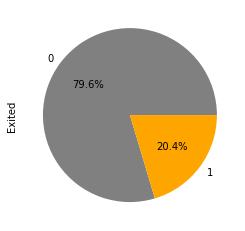

In [36]:
data['Exited'].value_counts().plot(kind='pie', autopct= '%1.1f%%', colors = ['grey', 'orange']);

In [ ]:
ProfileReport(data, minimal=True)

In [38]:
report_sv = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)


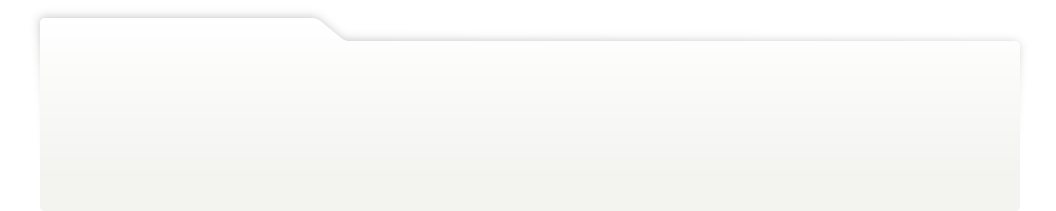
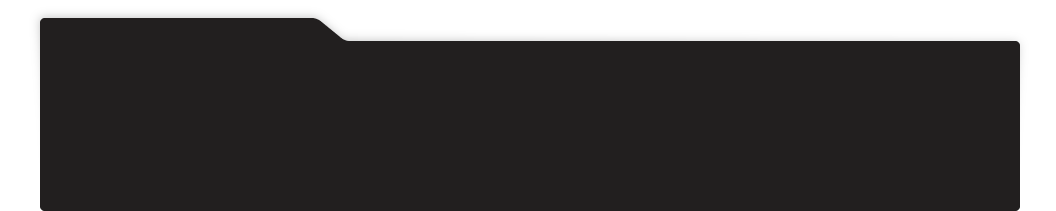
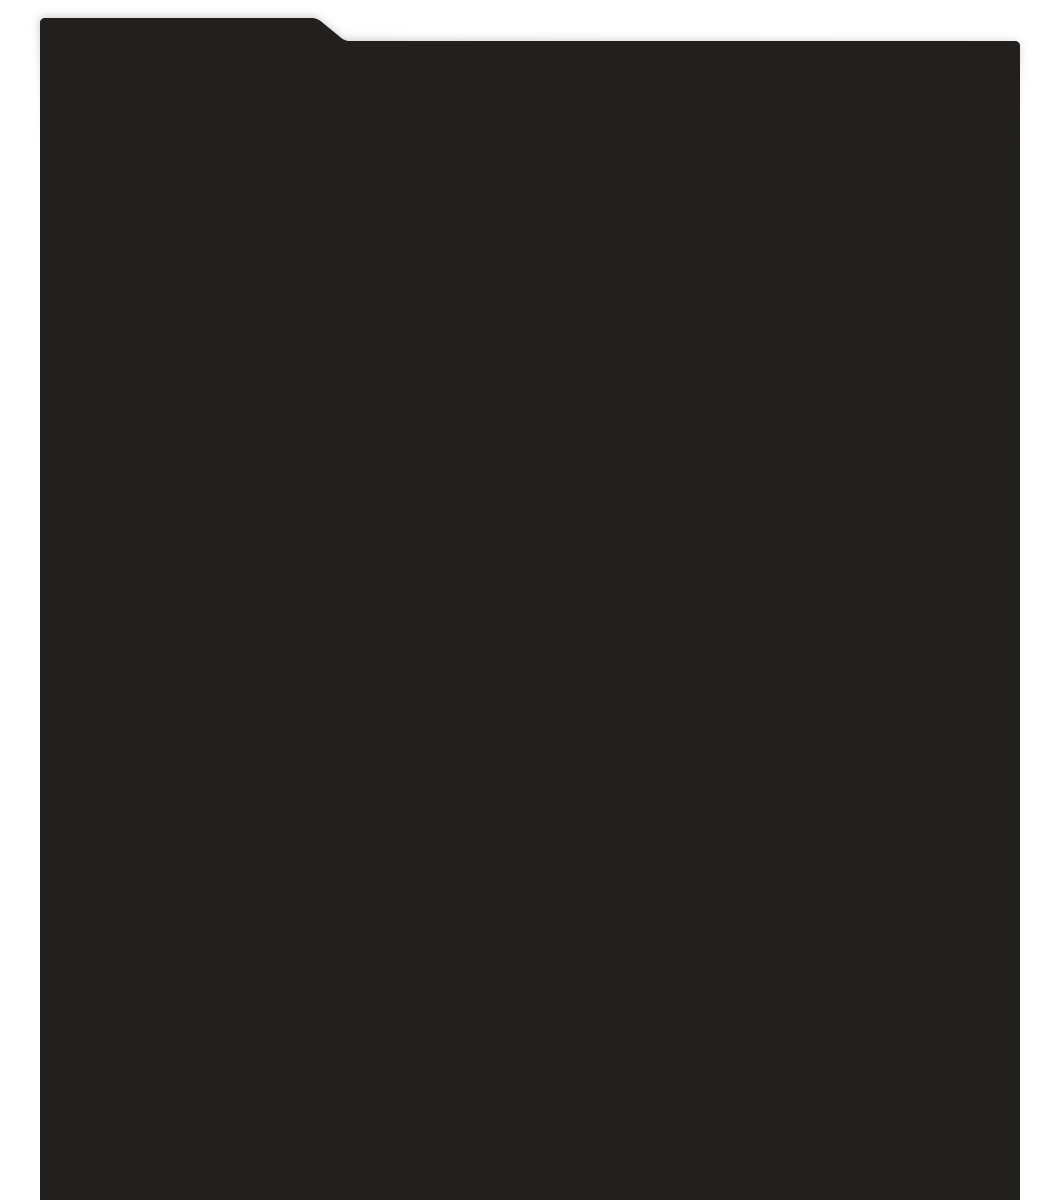
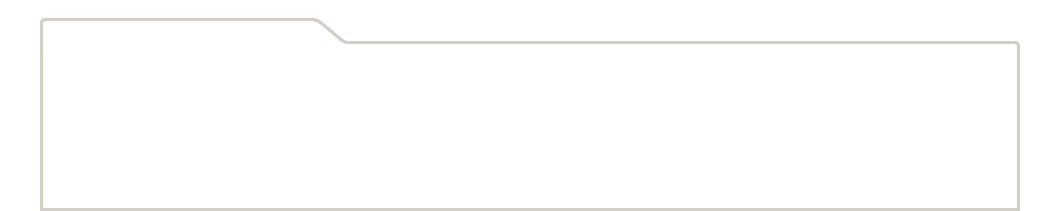
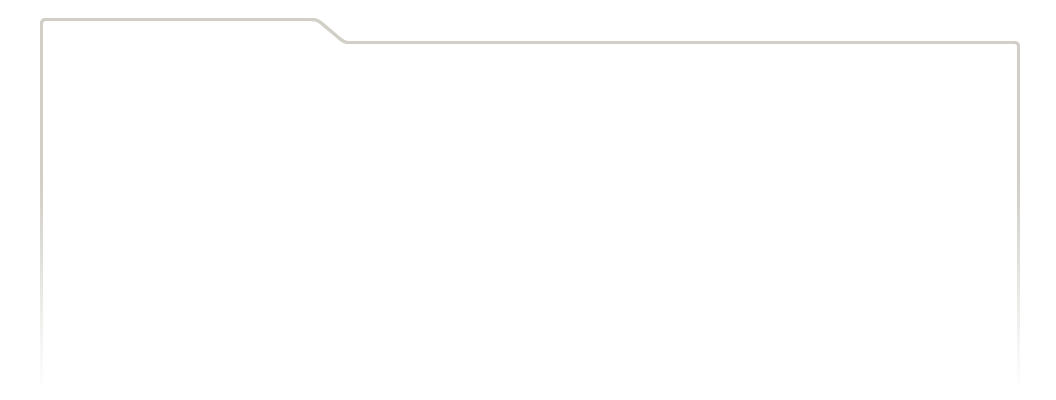
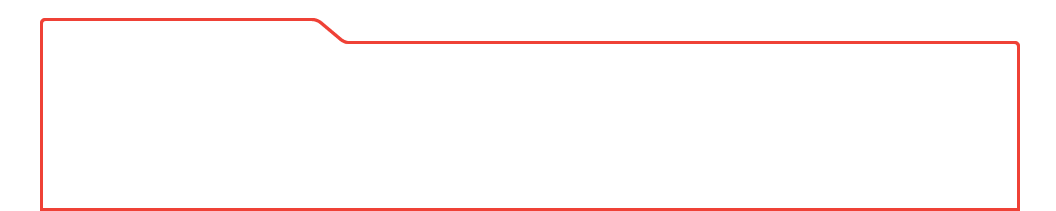
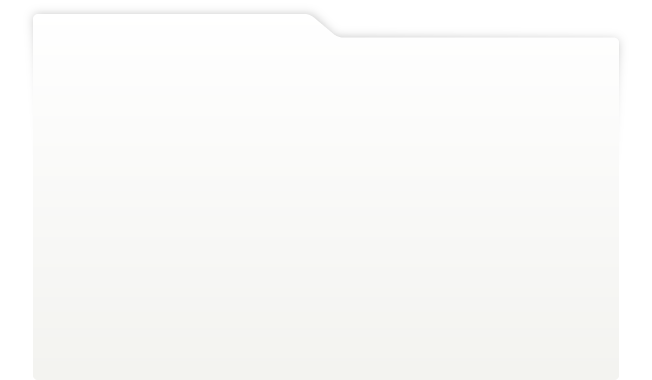
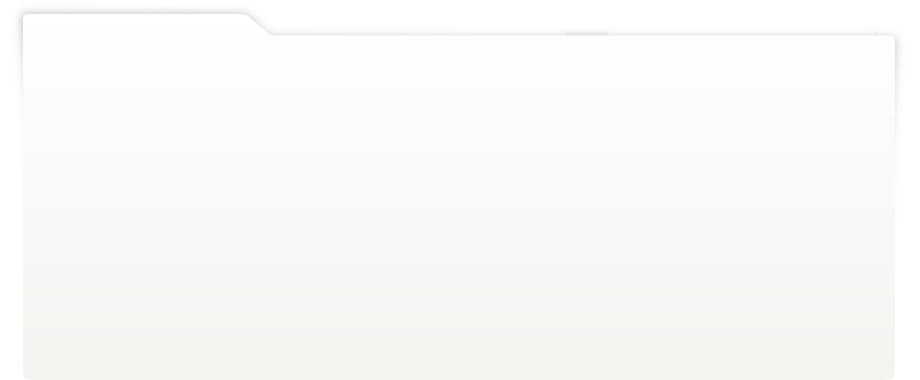
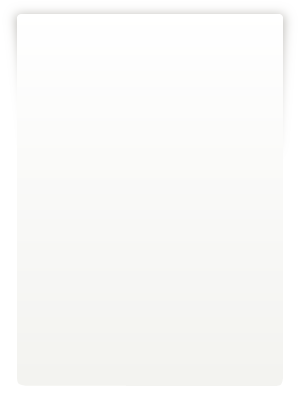
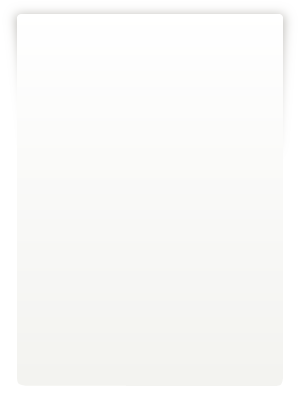
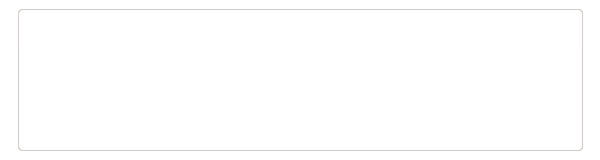
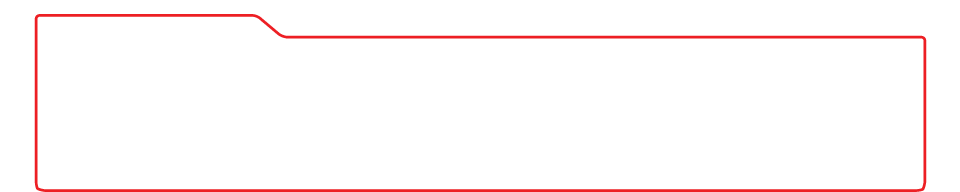
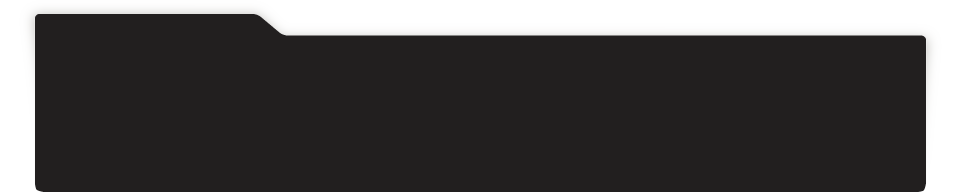
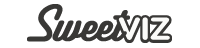
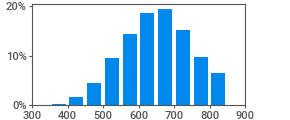
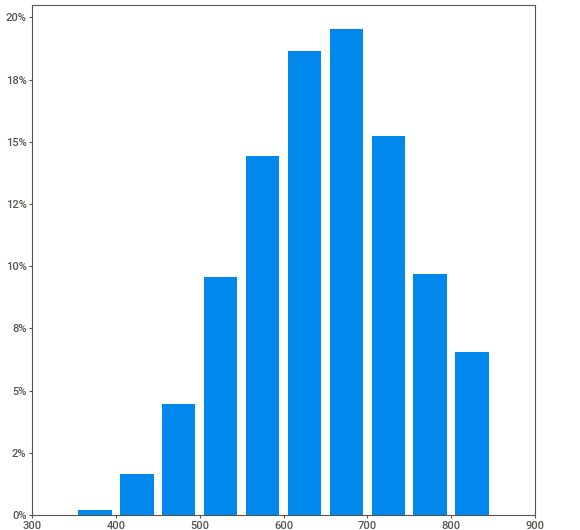
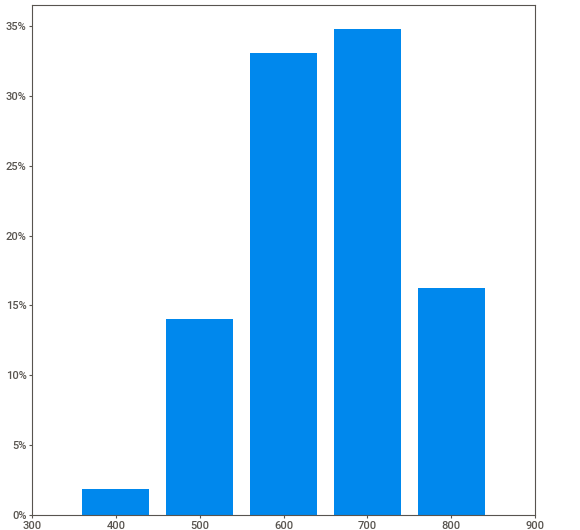
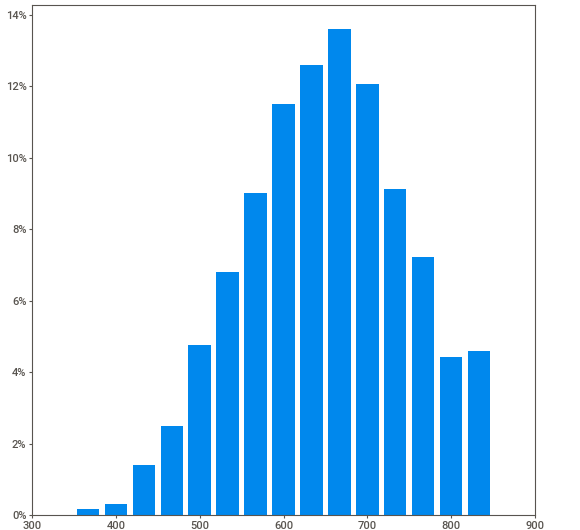
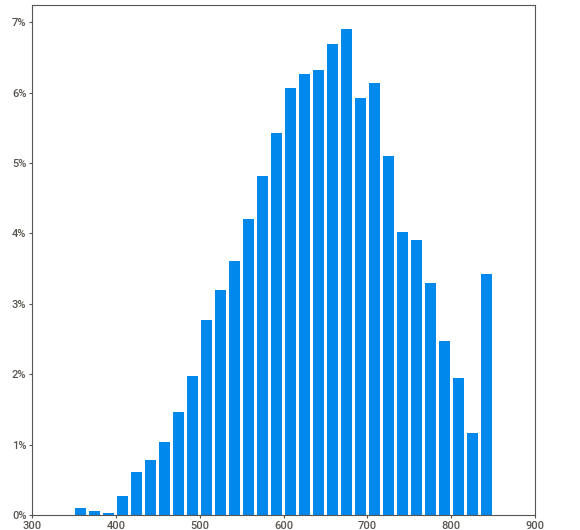
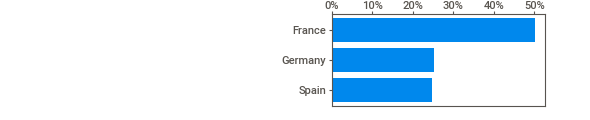
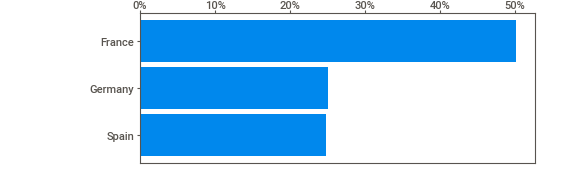
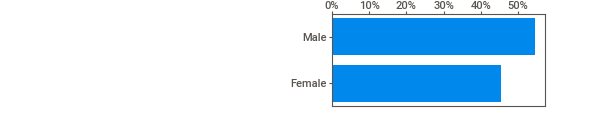
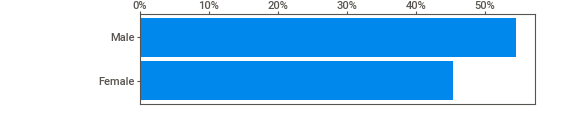
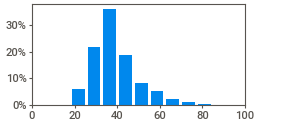
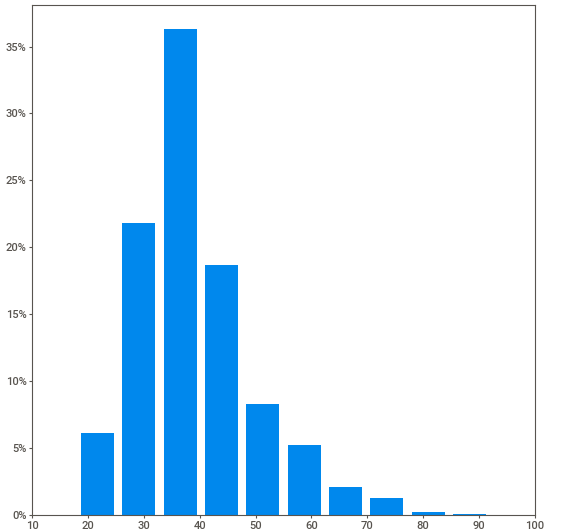
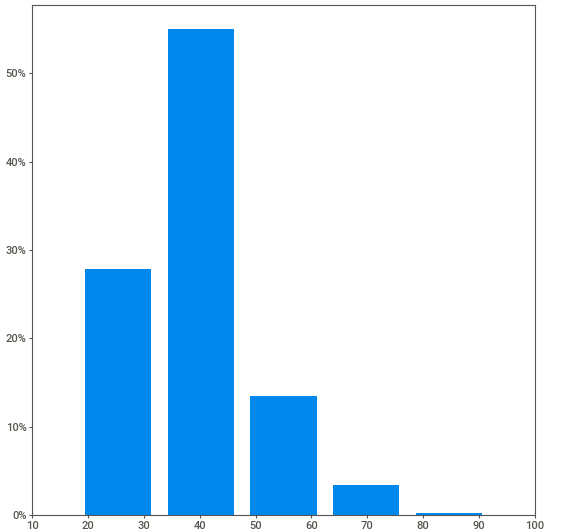
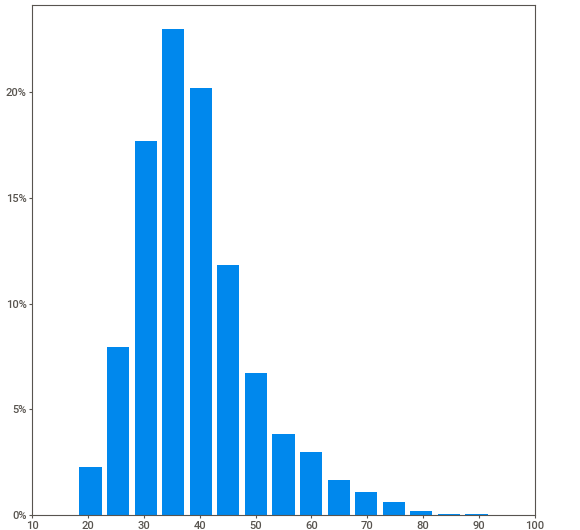
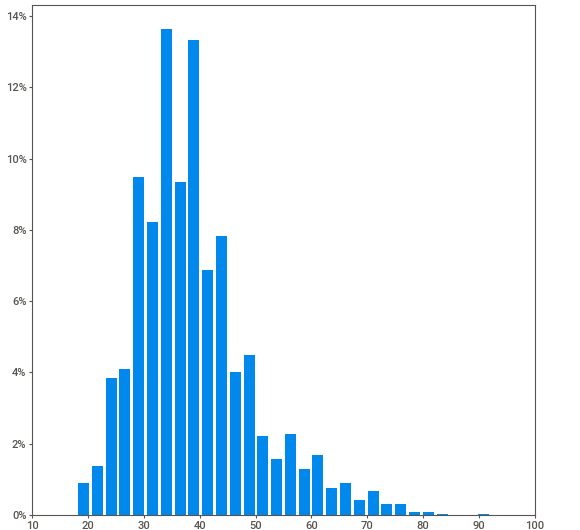
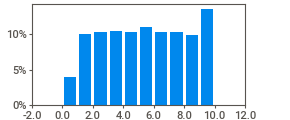
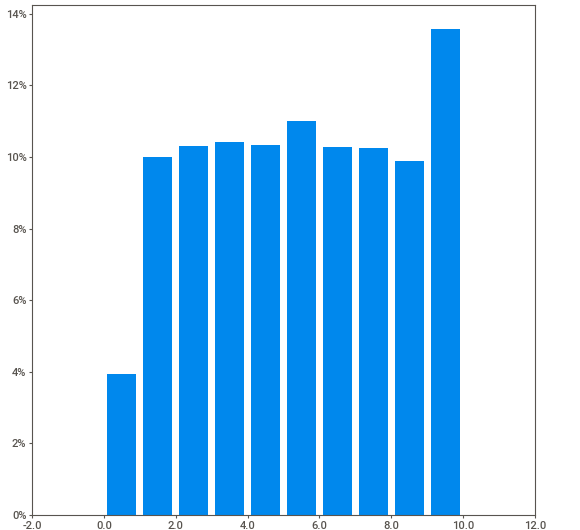
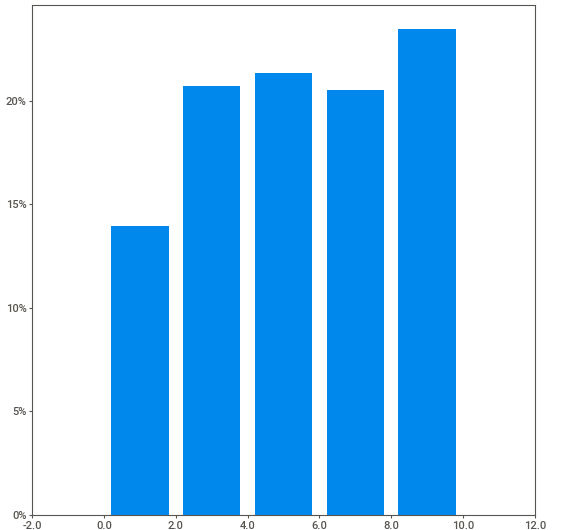
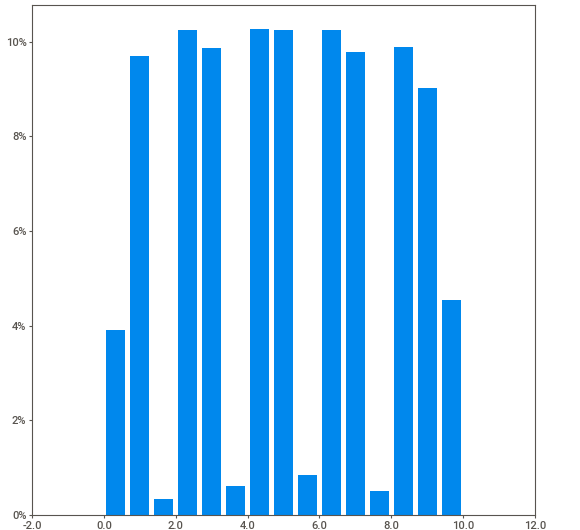
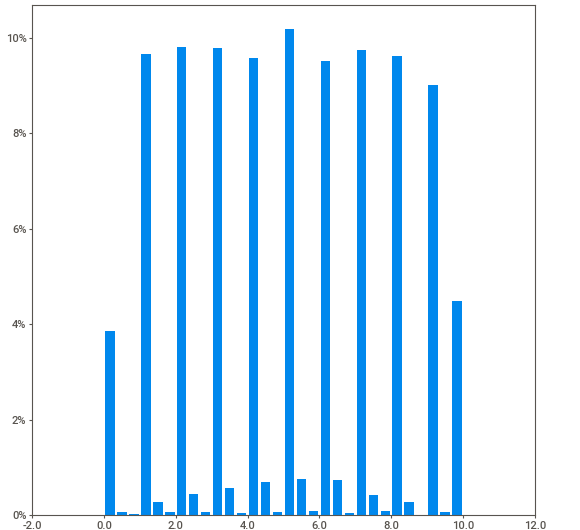
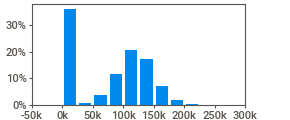
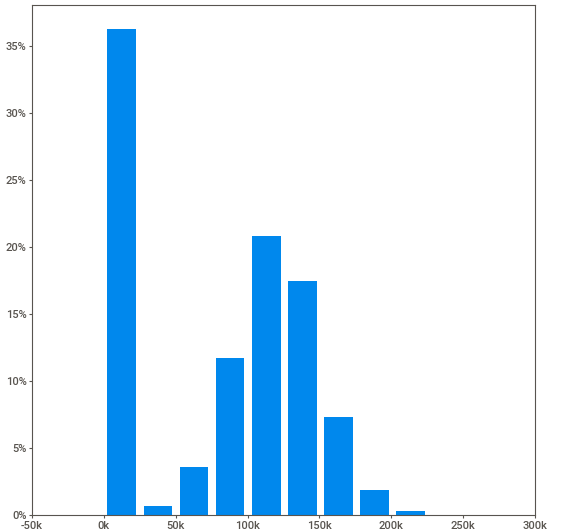
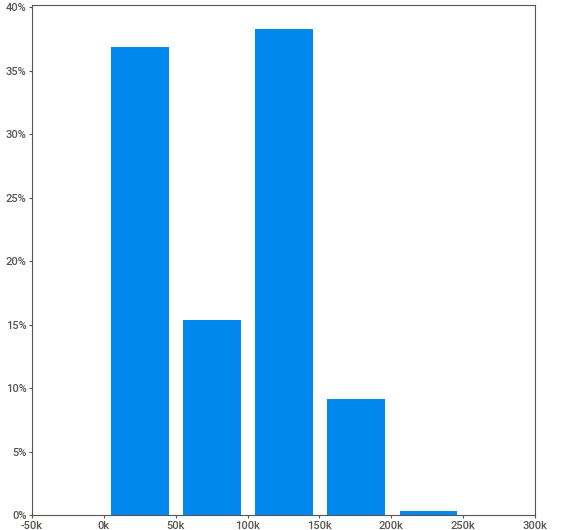
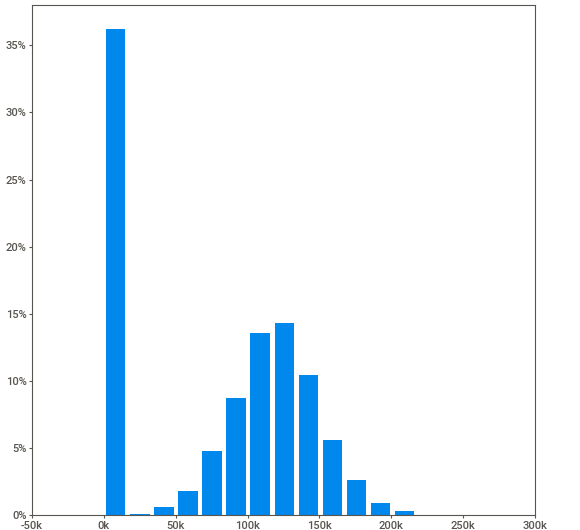
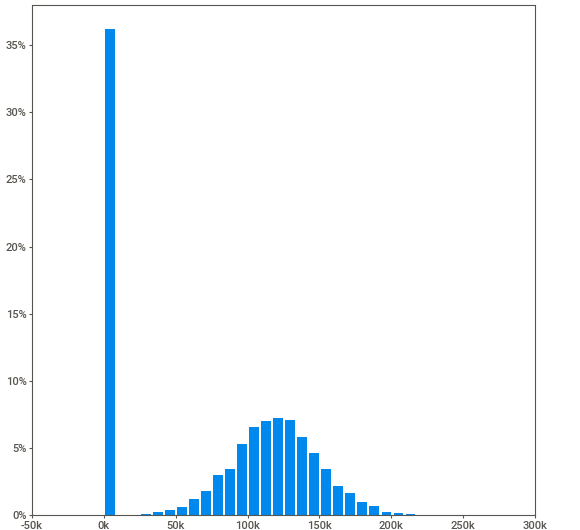
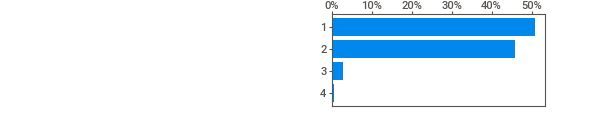
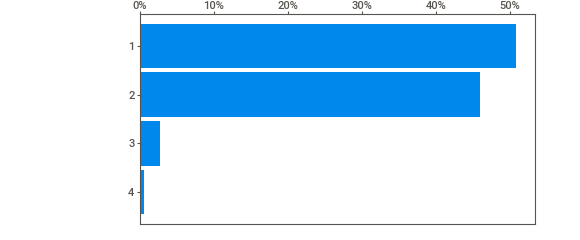
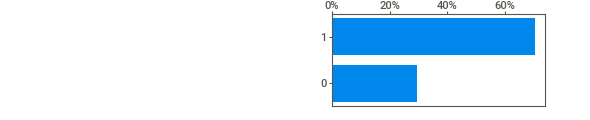
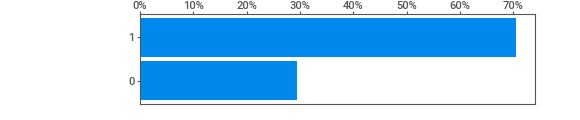
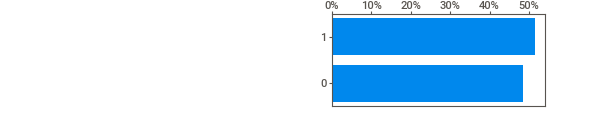
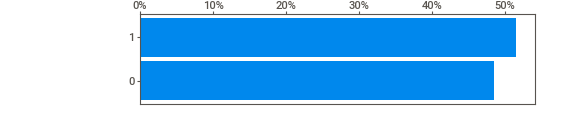
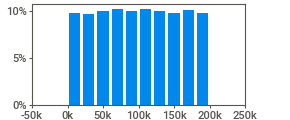
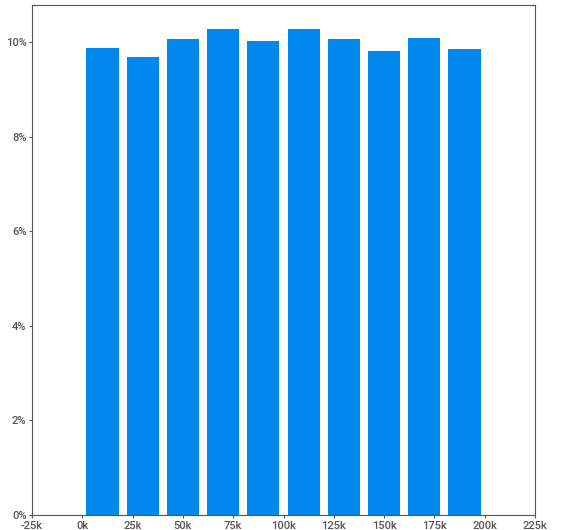
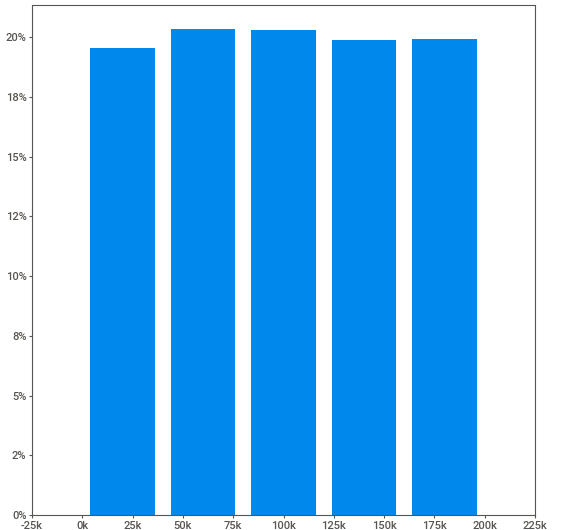
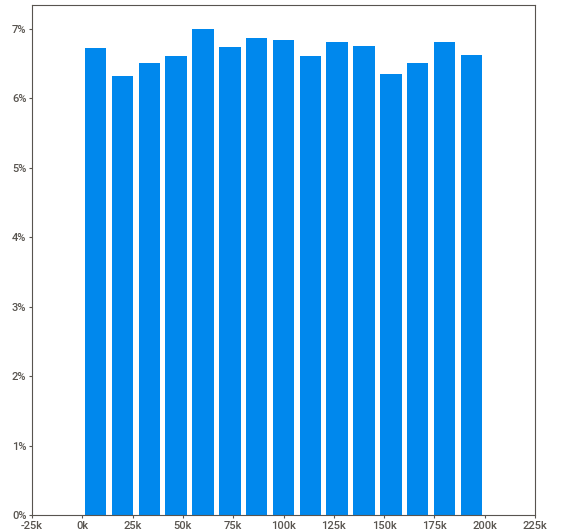
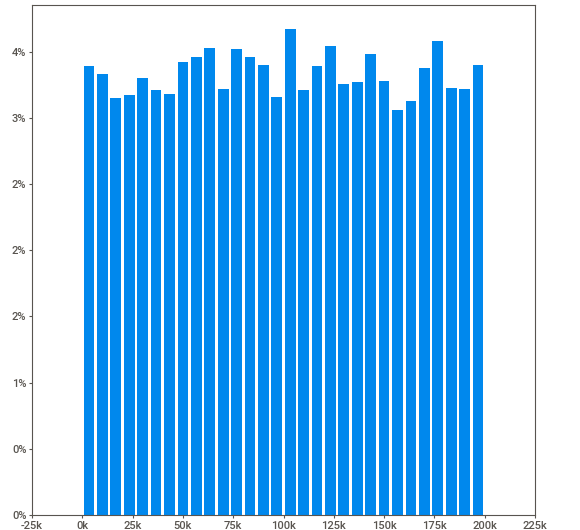
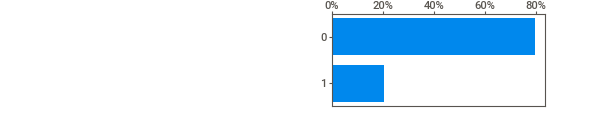
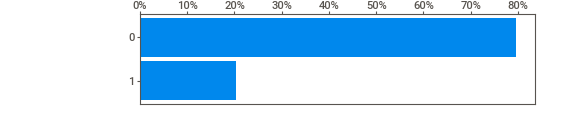
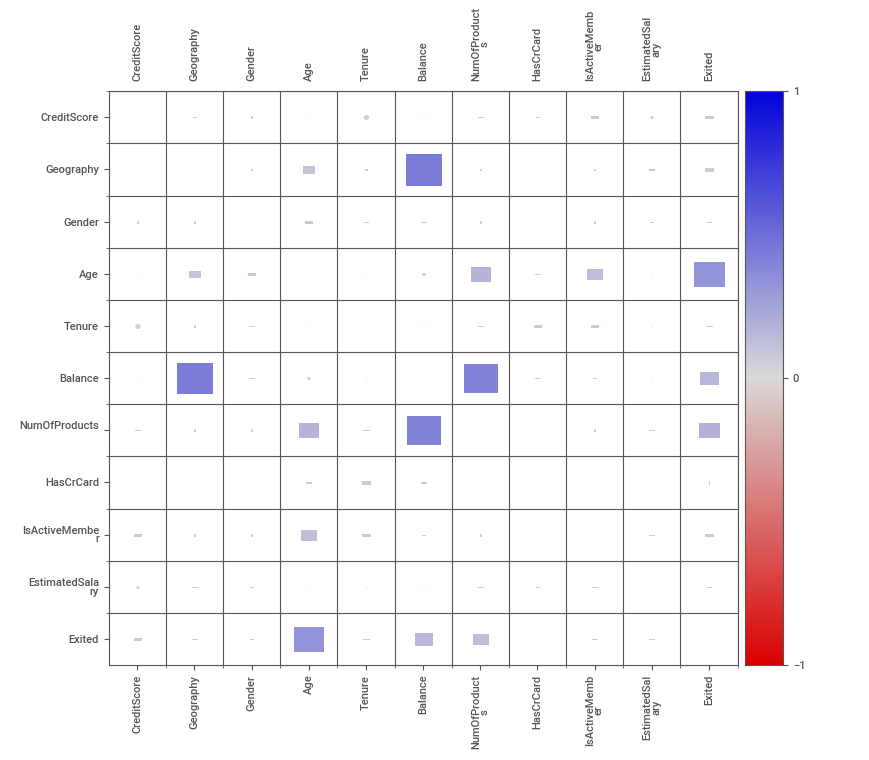
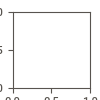

In [69]:
report_sv.show_notebook()

В данных есть дисбаланс: записей об оставшихся клиентах явно больше, чем об ушедших.    

---

Это задача классификации, для обучения попробую три модели: ```LogisticRegression```, ```DecisionTreeClassifier``` и ```RandomForestClassifier```.   
Оценивать модели буду по метрике f1_score, также для каждой посчитаю roc_auc_score.

Сначала обучу модели без учёта дисбаланса классов (гиперпараметры пока не трогаю).

### Без учёта дисбаланса классов:

In [40]:
# LogisticRegression
model_logistic = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_logistic.fit(features_train, target_train)
predictions_logistic = model_logistic.predict(features_valid)

# f1_score на валидационной выборке
f1_score(target_valid, predictions_logistic)

0.3333333333333333

In [41]:
# roc_auc_score
probabilities_valid = model_logistic.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:, 1])

0.7588934121304871

---


In [42]:
# DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=12345)
model_tree.fit(features_train, target_train)
predictions_tree = model_tree.predict(features_valid)

# f1_score на валидационной выборке
f1_score(target_valid, predictions_tree)

0.4904306220095694

In [43]:
# roc_auc_score
probabilities_valid = model_tree.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:, 1])

0.677895462711485

---


In [44]:
# RandomForestClassifier
model_forest = RandomForestClassifier(random_state=12345)
model_forest.fit(features_train, target_train)
predictions_forest = model_forest.predict(features_valid)

# f1_score на валидационной выборке
f1_score(target_valid, predictions_forest)

0.5910447761194029

In [45]:
# roc_auc_score
probabilities_valid = model_forest.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:, 1])

0.840789624906998

Лучший результат, без учёта дисбаланса классов и изменения гиперпараметров, - **0.59**.

Попробую его улучшить с учетом баланса классов.

---



### С учётом дисбаланса классов:

##### class_weight='balanced'

Для начала просто добавлю моделям ```class_weight='balanced'``` (логистическая регрессия имеет слишком малый f1_score, так как это моя самая важная метрика по задаче, далее не рассматриваю).

In [46]:
# DecisionTreeClassifier
model_balanced_tree = DecisionTreeClassifier(
    random_state=12345, class_weight='balanced')
model_balanced_tree.fit(features_train, target_train)

predictions_balanced = model_balanced_tree.predict(features_test)
f1_score(target_test, predictions_balanced)

0.48964677222898906

In [47]:
# roc_auc
probabilities_valid = model_balanced_tree.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:, 1])

0.6772875471058983

In [48]:
# RandomForestClassifier
model_balanced_forest = RandomForestClassifier(
    random_state=12345, class_weight='balanced')
model_balanced_forest.fit(features_train, target_train)

predictions_balanced = model_balanced_forest.predict(features_test)
f1_score(target_test, predictions_balanced)

0.49367088607594933

In [49]:
# roc_auc
probabilities_valid = model_balanced_forest.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:, 1])

0.8413000018146733

---


Поменяю гиперпараметры:

In [50]:
# DecisionTreeClassifier
best_tree_model = None
best_result = 0
tree_depth = 0

# max_depth
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth = i, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    probabilities_valid = model.predict_proba(features_valid)       
    result = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if result > best_result:
        best_result = result
        best_tree_model = model
        tree_depth =  i
        
min_samples_tree = 2

for samp in range(2, 6):
    model = DecisionTreeClassifier(
        random_state=12345, max_depth = tree_depth, min_samples_split=samp, class_weight='balanced') 
    model.fit(features_train, target_train) 
    probabilities_valid = model.predict_proba(features_valid)       
    result = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if result > best_result:
        best_tree_model = model 
        best_result = result 
        min_samples_tree = samp
                

# roc_auc на валидационной выборке
best_result 

0.8310244134068074

In [51]:
# f1_score
predictions_valid = best_tree_model.predict(features_valid)
f1_score(target_valid, predictions_valid)

0.5963791267305644

In [52]:
# RandomTreeClassifier
best_forest_model = None
best_result = 0
forest_estimators = 0

for est in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') 
    model.fit(features_train, target_train) 
    probabilities_valid = model.predict_proba(features_valid)       
    result = roc_auc_score(target_valid, probabilities_valid[:, 1]) 
    if result > best_result:
        best_forest_model = model 
        best_result = result 
        forest_estimators = est

# max_depth
forest_depth = 1

for depth in range(1, 20):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=forest_estimators, max_depth = depth, class_weight='balanced') 
    model.fit(features_train, target_train) 
    probabilities_valid = model.predict_proba(features_valid)       
    result = roc_auc_score(target_valid, probabilities_valid[:, 1]) 
    if result > best_result:
        best_forest_model = model 
        best_result = result 
        forest_depth = depth      
        
# min_samples_split
min_samples = 2

for samp in range(2, 6):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=forest_estimators, max_depth = depth, min_samples_split=samp, class_weight='balanced') 
    model.fit(features_train, target_train) 
    probabilities_valid = model.predict_proba(features_valid)       
    result = roc_auc_score(target_valid, probabilities_valid[:, 1]) 
    if result > best_result:
        best_forest_model = model 
        best_result = result 
        min_samples = samp        
        
# roc_auc на валидационной выборке
best_result  

0.8531536000096782

In [53]:
# f1_score
predictions_valid = best_forest_model.predict(features_valid)
f1_score(target_valid, predictions_valid)

0.6281352235550708

---

C измененными гиперпараметрами и учётом веса классов ```RandomForestClassidier``` имеет достаточный f1_score = **0.62** на валидационной выборке для выполнения задачи.

##### Уменьшение выборки

Теперь попробую обучить модели на более сбалансированных данных изначально.   

Сделаю отдельную тренировочную выборку с равным количеством 0 и 1 в целевом признаке:

In [54]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [55]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [56]:
target_downsampled.shape[0]

2637

In [57]:
target_downsampled.value_counts()

0    1441
1    1196
Name: Exited, dtype: int64

Тренировочная выборка стала ~ в два раза меньше, но теперь ушедших и оставшихся клиентов в ней поровну.

---

Обучу модели без перебора гиперпараметров и посмотрю на f1_score:

In [58]:
# DecisionTreeClassifier
tree_downsamp = DecisionTreeClassifier(
        random_state=12345)
tree_downsamp.fit(features_downsampled, target_downsampled)

predictions_valid = tree_downsamp.predict(features_valid)
f1_score(target_valid, predictions_valid)

0.5055698371893744

In [59]:
# RandomForestClassifier
forest_downsamp = RandomForestClassifier(
    random_state=12345)
forest_downsamp.fit(features_downsampled, target_downsampled)

predictions_valid = forest_downsamp.predict(features_valid)
f1_score(target_valid, predictions_valid)

0.6047966631908238

Результат ```RandomForest``` лучше. Попробую подобрать ей гиперпараметры:

In [60]:
# RandomTreeClassifier -> Downsampled
best_forest_model_downsamp = None
best_result = 0
forest_estimators_d = 0

for est in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_downsampled, target_downsampled) 
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result:
        best_forest_model_downsamp = model 
        best_result = result 
        forest_estimators_d = est

# max_depth
forest_depth_d = 1

for depth in range(1, 20):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=forest_estimators, max_depth = depth) 
    model.fit(features_downsampled, target_downsampled) 
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result:
        best_forest_model_downsamp = model 
        best_result = result 
        forest_depth_d = depth      
        
# min_samples_split
min_samples_d = 2

for samp in range(2, 6):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=forest_estimators, max_depth = depth, min_samples_split=samp) 
    model.fit(features_downsampled, target_downsampled) 
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid) 
    if result > best_result:
        best_forest_model_downsamp = model 
        best_result = result 
        min_samples_d = samp        
        
# f1_score на валидационной выборке
best_result

0.6162280701754386

In [61]:
# roc_auc_score
probabilities_valid = best_forest_model_downsamp.predict_proba(features_valid)       
roc_auc_score(target_valid, probabilities_valid[:, 1])

0.837744754081503

В итоге получилась модель ```best_forest_model``` достаточная, для выболнения задачи, чуть лучшая, чем ```best_forest_model_downsamp```.  

**Промежуточный вывод**: учитывать дисбаланс классов важно при обучении модели, это может значительно улучшить результат. В моем случае два рассмотренных способа борьбы с дисбалансом классов показывают +\- одинаковый (0,62 против 0,61 f1_score) положительный результат.

Для дальнейшего тестирования возьму модель ```best_forest_model```.

## Тестирование модели

Сделаю проверку f1_score на test данных, так же посчитаю roc_auc, матрицу и построю кривую.

**best_forest_model_downsamp**:

Итоговая модель для тестирования

In [62]:
best_forest_model

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=18,
                       random_state=12345)

Важность признаков для определения целевого у неё внутри:

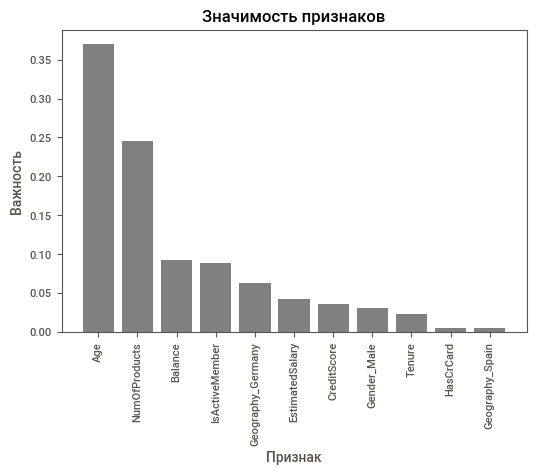

In [63]:
importances = best_forest_model.feature_importances_

# График
indices = np.argsort(importances)[::-1]

plt.bar(range(features_train.shape[1]), importances[indices], color=['grey'])
plt.xticks(range(features_train.shape[1]), features_train.columns[indices], rotation=90)
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.title('Значимость признаков')
plt.show()

---

**Тестирование:**

In [64]:
predictions_best_forest_model = best_forest_model.predict(features_test)

# f1_score на тестовой выборке
f1_score(target_test, predictions_best_forest_model)

0.6025641025641025

In [65]:
# roc_auc_score на тестовой выборке
probabilities_test = best_forest_model.predict_proba(features_test)
roc_auc_score(target_test, probabilities_test[:, 1])

0.8530718619157481

In [66]:
# Матрица
confusion_matrix(target_test, predictions_best_forest_model)

array([[1346,  231],
       [ 141,  282]])

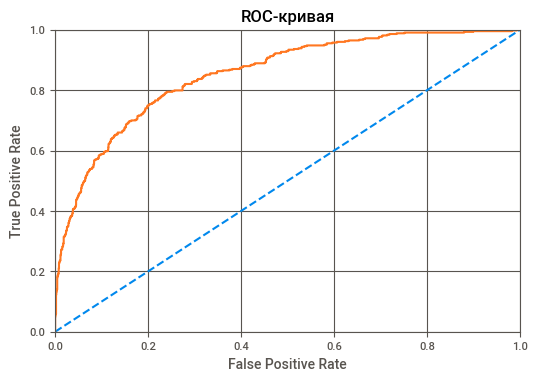

In [67]:
# График ROC_AUC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test[:, 1])

plt.figure();
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-кривая');

**Вывод:** f1_score на тестовой выборке **0,60**, что является необходимым минимумом для задачи.

## Вывод

**Дано:** исторические данные о поведении клиентов и расторжении договоров с банком.  

**Задача:** спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Построить модель с предельно большим значением F1-меры. Дополнительно измерить AUC-ROC, сравнить её значение с F1-мерой.

---

Изначальные данные нуждались в предподготовке, было сделано:

- Удаление не нужных для обучения столбцов с фамилиями и идентификаторами клиентов;
- Кодирование категориальных данных;
- Заполнение пропусков в данных;
- Масштабирование данных.

Так же в данных был обнаружен дисбаланс записей о клиентах ушедших и оставшихся.  

---

Дальнейшая работа делится на следующие этапы:

- Разбитие данных на обучающую, валидационную и тестовую выборки;
- Подбор оптимальной модели для решения задачи без учёта дисбаланса классов на основе главной запрашиваемой метрики f1;
- Учёт дисбаланса классов несколькими способами. Подбор оптимальных гиперпараметров для модели;
- Тестирование модели на заранее подготовленной выборке.

---

**Ход работы:**  
Исходные данные были разделены на три части по принципу 60% + 20% + 20%, где большая часть это тренировочные данные.  

Было рассмотрено три модели: Логистическая регрессия, DecisionTreeClassifier и RandomForestClassifier.
Лучший результат показал RandomForestClassifier. После учёта баланса классов и подбора гиперпараметров была получена ```best_forest_model```:

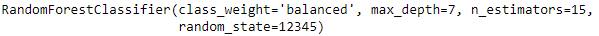

Модель предсказывает покинет клиент банк или нет принимая что признаки влияют на целевой с такой важностью:

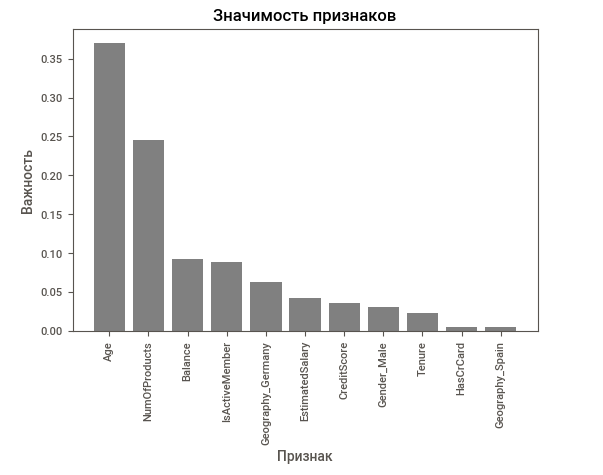

В ходе проверки этой модели на тестовой выборке были получены результаты:  
    
**f1_score:** 0.6  
**roc_auc_score:** 0.85 
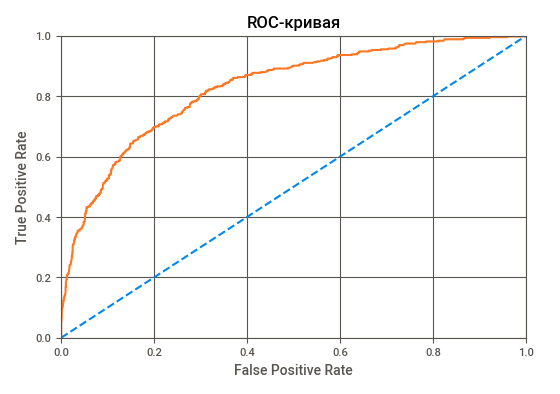

Что удовлетворяет условиям задачи.